#Preprocessing and Text Normalization

In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Download stopwords from NLTK
nltk.download('stopwords')

# Define Gujarati stopwords
marathi_stopwords = set(["आहे", "आहेस", "आहेत", "होते", "होतेस", "होतेत", "झालं", "झाली", "झाले", "हे", "तो", "ती", "ते", "या", "या", "मी", "आम्ही", "तू", "तुम्ही", "आम्हाला", "तुला", "तुम्हाला", "माझं", "तुझं", "तिचं", "त्याचं", "त्यांचं", "त्यांचा", "तिचा", "तिचं", "त्यात", "त्यावर", "त्याच्या", "यांच्या", "हा", "ह्या", "त्या", "मी", "आम्हाला", "आहे", "होते", "नाही", "कधी", "कुठे", "का", "जेव्हा", "जे", "कोण", "कसा", "कसे", "किती", "इथे", "तिथे", "आता", "पुन्हा", "म्हणून", "किंवा", "पण", "मात्र", "म्हणूनच", "जर", "तर", "आणि", "बरोबर", "नाहीतर", "शक्यतो", "सगळे", "संपूर्ण", "काही", "कोणता", "कोणती", "कोणते", "काय", "कुठला", "कुठेही", "कुणीही", "काहीच", "काहीही", "सर्व", "तसेच", "म्हणूनच", "आता", "पुढे", "मागे", "नेहमी", "थोडा", "खूप", "मोठा", "छोटा", "साधारण", "पूर्ण", "नंतर"
])


# Load the dataset
data = pd.read_csv('marathi.csv')  # Replace with your actual path

# Text cleaning function for normalization
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation and special characters
    text = re.sub(r'[^\u0900-\u097F ]', '', text)  # Keep only Marathi (Devanagari) characters
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = ' '.join([word for word in text.split() if word not in marathi_stopwords])  # Remove stopwords
    return text

# Apply the text cleaning function to the 'Sentence' column
data['cleaned_text'] = data['Sentence'].apply(clean_text)

# Filter sentences based on length (e.g., between 5 and 50 words)
min_length = 5
max_length = 50

def filter_sentence_length(text):
    word_count = len(text.split())
    return min_length <= word_count <= max_length

data = data[data['cleaned_text'].apply(filter_sentence_length)]

# Label encoding for Sentiment and Emotion
sentiment_encoder = LabelEncoder()
emotion_encoder = LabelEncoder()

data['Sentiment_encoded'] = sentiment_encoder.fit_transform(data['Sentiment'])
data['Emotion_encoded'] = emotion_encoder.fit_transform(data['Emotion'])

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(data['cleaned_text'])

# Splitting the dataset into training and testing sets
X_train_sent, X_test_sent, y_train_sent, y_test_sent = train_test_split(X, data['Sentiment_encoded'], test_size=0.2, random_state=42)
X_train_emo, X_test_emo, y_train_emo, y_test_emo = train_test_split(X, data['Emotion_encoded'], test_size=0.2, random_state=42)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-1-3f8ae73b2e09>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sentiment_encoded'] = sentiment_encoder.fit_transform(data['Sentiment'])
<ipython-input-1-3f8ae73b2e09>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Emotion_encoded'] = emotion_encoder.fit_transform(data['Emotion'])


#Training the Logistic Regression Models

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize Logistic Regression model with class balancing
sentiment_model = LogisticRegression(max_iter=1000, class_weight='balanced')
emotion_model = LogisticRegression(max_iter=1000, class_weight='balanced')

# Train the sentiment model
sentiment_model.fit(X_train_sent, y_train_sent)

# Train the emotion model
emotion_model.fit(X_train_emo, y_train_emo)

# Make predictions on test data
y_pred_sent = sentiment_model.predict(X_test_sent)
y_pred_emo = emotion_model.predict(X_test_emo)

# Evaluate sentiment model
accuracy_sent = accuracy_score(y_test_sent, y_pred_sent)
precision_sent = precision_score(y_test_sent, y_pred_sent, average='weighted')
recall_sent = recall_score(y_test_sent, y_pred_sent, average='weighted')
f1_sent = f1_score(y_test_sent, y_pred_sent, average='weighted')
conf_matrix_sent = confusion_matrix(y_test_sent, y_pred_sent)

# Evaluate emotion model
accuracy_emo = accuracy_score(y_test_emo, y_pred_emo)
precision_emo = precision_score(y_test_emo, y_pred_emo, average='weighted')
recall_emo = recall_score(y_test_emo, y_pred_emo, average='weighted')
f1_emo = f1_score(y_test_emo, y_pred_emo, average='weighted')
conf_matrix_emo = confusion_matrix(y_test_emo, y_pred_emo)

# Display the evaluation metrics for Sentiment
print("Sentiment Model Evaluation:")
print(f"Accuracy: {accuracy_sent}")
print(f"Precision: {precision_sent}")
print(f"Recall: {recall_sent}")
print(f"F1 Score: {f1_sent}")
print("Confusion Matrix:")
print(conf_matrix_sent)

# Display the evaluation metrics for Emotion
print("\nEmotion Model Evaluation:")
print(f"Accuracy: {accuracy_emo}")
print(f"Precision: {precision_emo}")
print(f"Recall: {recall_emo}")
print(f"F1 Score: {f1_emo}")
print("Confusion Matrix:")
print(conf_matrix_emo)


Sentiment Model Evaluation:
Accuracy: 0.9945731522547588
Precision: 0.9945737405418661
Recall: 0.9945731522547588
F1 Score: 0.9945729152905781
Confusion Matrix:
[[12429     2     3]
 [    3 12139    82]
 [    3   104 11536]]

Emotion Model Evaluation:
Accuracy: 0.9183218093165477
Precision: 0.9186309000847356
Recall: 0.9183218093165477
F1 Score: 0.9182303842941734
Confusion Matrix:
[[3987    1    4    1    3    0    8    0    1]
 [   0 4315    1    1    0    0    0    0    0]
 [  12    0 3821    0   11    0    5    8    2]
 [   0    0    0 2842    0    0    1    0 1207]
 [   2    0   47    0 3942   23    2    7    0]
 [   4    1   10    0   10 3599    2    1    1]
 [   5    0    2    1    2    0 3982    0    0]
 [   5    0   23    0   15    0    3 4314    0]
 [   0    0    0 1532    0    0    1    0 2534]]


#Testing with Custom Gujarati Sentences and Their English Translation

In [3]:
# Custom sentences for testing (Gujarati poetry)
custom_sentences = ["तुझ्या कटू शब्दांनी मनात धगधगणारा अंगार अजून तीव्र होत चालला आहे",
"तुझं अशा रीतीने दूर जाणं जणू प्रत्येक दिवस थोडा थोडा कमी उजेडाचा होत जातोय",
"सत्य समोर आलं तेव्हा सगळ्या स्वप्नांचा चुराडा झाल्याचं जाणवलं, पण तरीही चालावं लागतं",
"शांततेत बसून वाऱ्याच्या हळुवार स्पर्शात विश्वाचं गूढ हळूहळू उलगडत जातं",
"तुझ्या सहवासात प्रत्येक क्षणाचं अनमोल महत्त्व उमजतं, आणि जग सुंदर भासतं"
]

# English translations for reference
english_translations = ["Your bitter words have only intensified the smoldering fire within me",
"Your departure in this manner makes it feel like each day grows dimmer and dimmer",
"When the truth came forward, it felt like all dreams shattered, yet the journey must continue",
"Sitting quietly and feeling the gentle touch of the wind, the mysteries of the universe slowly unfold",
"Every moment with you feels precious, and the world seems beautiful in your presence"

]

# Preprocess the custom sentences
custom_processed_sentences = [clean_text(sentence) for sentence in custom_sentences]

# Transform the custom sentences using the TF-IDF vectorizer
custom_tfidf = tfidf.transform(custom_processed_sentences)

# Predict sentiment for custom sentences
custom_sentiment_pred = sentiment_model.predict(custom_tfidf)
custom_emotion_pred = emotion_model.predict(custom_tfidf)

# Decode the predictions
custom_sentiment_labels = sentiment_encoder.inverse_transform(custom_sentiment_pred)
custom_emotion_labels = emotion_encoder.inverse_transform(custom_emotion_pred)

# Display the predictions alongside the original sentences and English translations
for i, sentence in enumerate(custom_sentences):
    print(f"Gujarati Sentence: {sentence}")
    print(f"English Translation: {english_translations[i]}")
    print(f"Predicted Sentiment: {custom_sentiment_labels[i]}")
    print(f"Predicted Emotion: {custom_emotion_labels[i]}")
    print("-" * 50)


Gujarati Sentence: तुझ्या कटू शब्दांनी मनात धगधगणारा अंगार अजून तीव्र होत चालला आहे
English Translation: Your bitter words have only intensified the smoldering fire within me
Predicted Sentiment: Negative
Predicted Emotion: Anger
--------------------------------------------------
Gujarati Sentence: तुझं अशा रीतीने दूर जाणं जणू प्रत्येक दिवस थोडा थोडा कमी उजेडाचा होत जातोय
English Translation: Your departure in this manner makes it feel like each day grows dimmer and dimmer
Predicted Sentiment: Negative
Predicted Emotion: Sadness
--------------------------------------------------
Gujarati Sentence: सत्य समोर आलं तेव्हा सगळ्या स्वप्नांचा चुराडा झाल्याचं जाणवलं, पण तरीही चालावं लागतं
English Translation: When the truth came forward, it felt like all dreams shattered, yet the journey must continue
Predicted Sentiment: Positive
Predicted Emotion: Hope
--------------------------------------------------
Gujarati Sentence: शांततेत बसून वाऱ्याच्या हळुवार स्पर्शात विश्वाचं गूढ हळूहळू उलगडत जातं


#ROC and AUC Curve Plotting

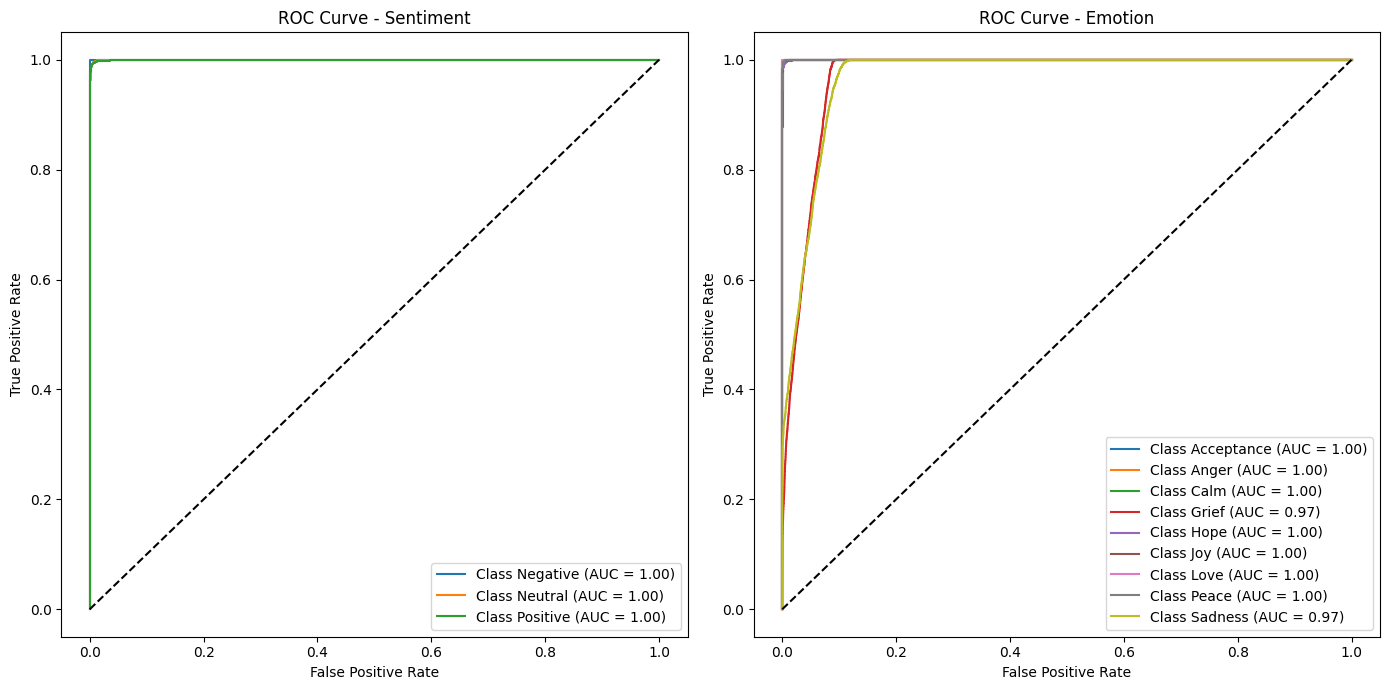

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the true labels for multi-class ROC/AUC
y_test_sent_binarized = label_binarize(y_test_sent, classes=range(len(sentiment_encoder.classes_)))
y_test_emo_binarized = label_binarize(y_test_emo, classes=range(len(emotion_encoder.classes_)))

# Get the predicted probabilities
y_pred_sent_proba = sentiment_model.predict_proba(X_test_sent)
y_pred_emo_proba = emotion_model.predict_proba(X_test_emo)

# Plot ROC and AUC for Sentiment
fpr_sent = {}
tpr_sent = {}
roc_auc_sent = {}

for i in range(len(sentiment_encoder.classes_)):
    fpr_sent[i], tpr_sent[i], _ = roc_curve(y_test_sent_binarized[:, i], y_pred_sent_proba[:, i])
    roc_auc_sent[i] = auc(fpr_sent[i], tpr_sent[i])

plt.figure(figsize=(14, 7))

# Plot ROC curves for Sentiment
plt.subplot(1, 2, 1)
for i in range(len(sentiment_encoder.classes_)):
    plt.plot(fpr_sent[i], tpr_sent[i], label=f'Class {sentiment_encoder.classes_[i]} (AUC = {roc_auc_sent[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Sentiment')
plt.legend(loc="lower right")

# Plot ROC and AUC for Emotion
fpr_emo = {}
tpr_emo = {}
roc_auc_emo = {}

for i in range(len(emotion_encoder.classes_)):
    fpr_emo[i], tpr_emo[i], _ = roc_curve(y_test_emo_binarized[:, i], y_pred_emo_proba[:, i])
    roc_auc_emo[i] = auc(fpr_emo[i], tpr_emo[i])

# Plot ROC curves for Emotion
plt.subplot(1, 2, 2)
for i in range(len(emotion_encoder.classes_)):
    plt.plot(fpr_emo[i], tpr_emo[i], label=f'Class {emotion_encoder.classes_[i]} (AUC = {roc_auc_emo[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Emotion')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()


#Double Bar Graph for True vs Predicted (Sentiment and Emotion)

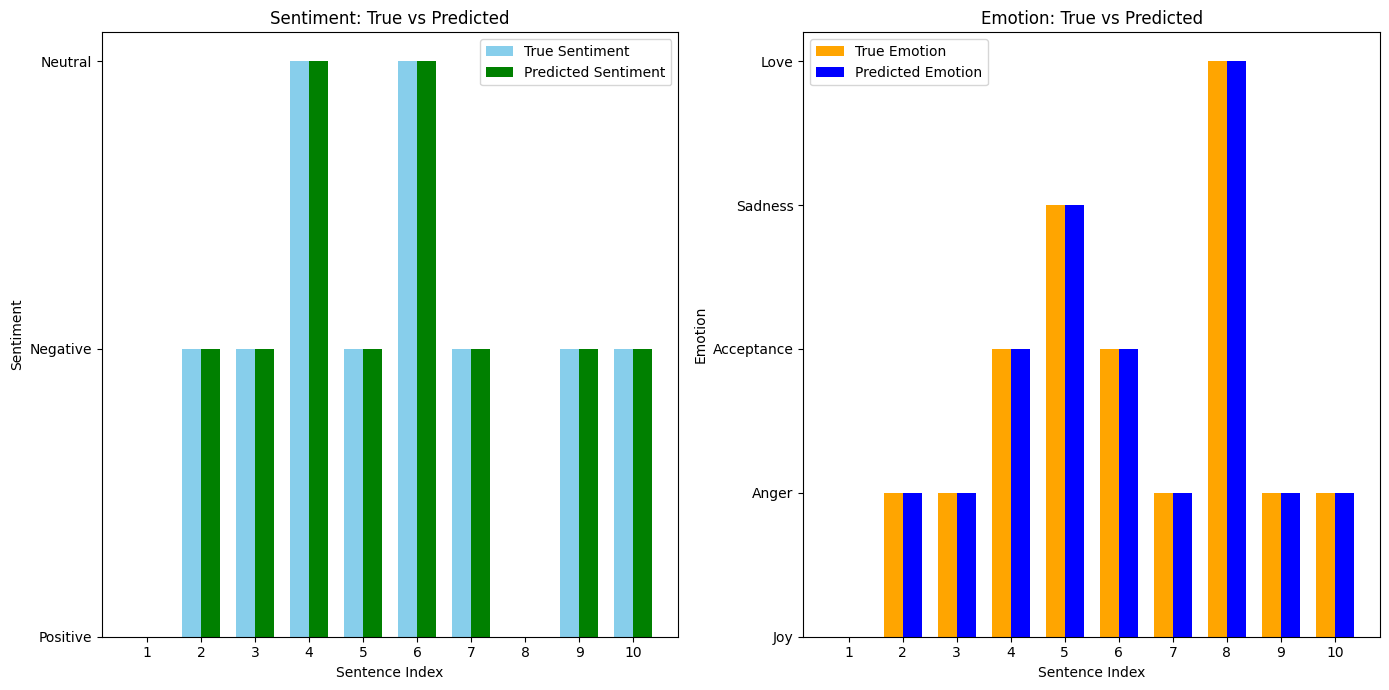

In [5]:
import numpy as np

# Randomly select 10 sentences from the dataset for testing
sample_data = data.sample(n=10, random_state=42)
sample_sentences = sample_data['Sentence'].tolist()
sample_true_sentiments = sample_data['Sentiment_encoded'].tolist()
sample_true_emotions = sample_data['Emotion_encoded'].tolist()

# Transform the sentences using the TF-IDF vectorizer
sample_tfidf = tfidf.transform(sample_data['cleaned_text'])

# Predict sentiment and emotion
pred_sent = sentiment_model.predict(sample_tfidf)
pred_emo = emotion_model.predict(sample_tfidf)

# Decode true and predicted labels
true_sent_labels = sentiment_encoder.inverse_transform(sample_true_sentiments)
true_emo_labels = emotion_encoder.inverse_transform(sample_true_emotions)
pred_sent_labels = sentiment_encoder.inverse_transform(pred_sent)
pred_emo_labels = emotion_encoder.inverse_transform(pred_emo)

# Plotting Bar Plot: True vs Predicted for Sentiment and Emotion
plt.figure(figsize=(14, 7))

# Sentiment Bar Plot
plt.subplot(1, 2, 1)
x = np.arange(len(sample_sentences))  # Label locations
bar_width = 0.35  # Width of the bars

# Plot bars for true sentiment
plt.bar(x - bar_width/2, true_sent_labels, width=bar_width, color='skyblue', label='True Sentiment')

# Plot bars for predicted sentiment
plt.bar(x + bar_width/2, pred_sent_labels, width=bar_width, color='green', label='Predicted Sentiment')

# Label the plot
plt.title('Sentiment: True vs Predicted')
plt.xlabel('Sentence Index')
plt.ylabel('Sentiment')
plt.xticks(x, range(1, len(sample_sentences) + 1))
plt.legend()

# Emotion Bar Plot
plt.subplot(1, 2, 2)
x = np.arange(len(sample_sentences))  # Label locations

# Plot bars for true emotion
plt.bar(x - bar_width/2, true_emo_labels, width=bar_width, color='orange', label='True Emotion')

# Plot bars for predicted emotion
plt.bar(x + bar_width/2, pred_emo_labels, width=bar_width, color='blue', label='Predicted Emotion')

# Label the plot
plt.title('Emotion: True vs Predicted')
plt.xlabel('Sentence Index')
plt.ylabel('Emotion')
plt.xticks(x, range(1, len(sample_sentences) + 1))
plt.legend()

plt.tight_layout()
plt.show()


#Line Graph for True vs Predicted (Sentiment and Emotion)

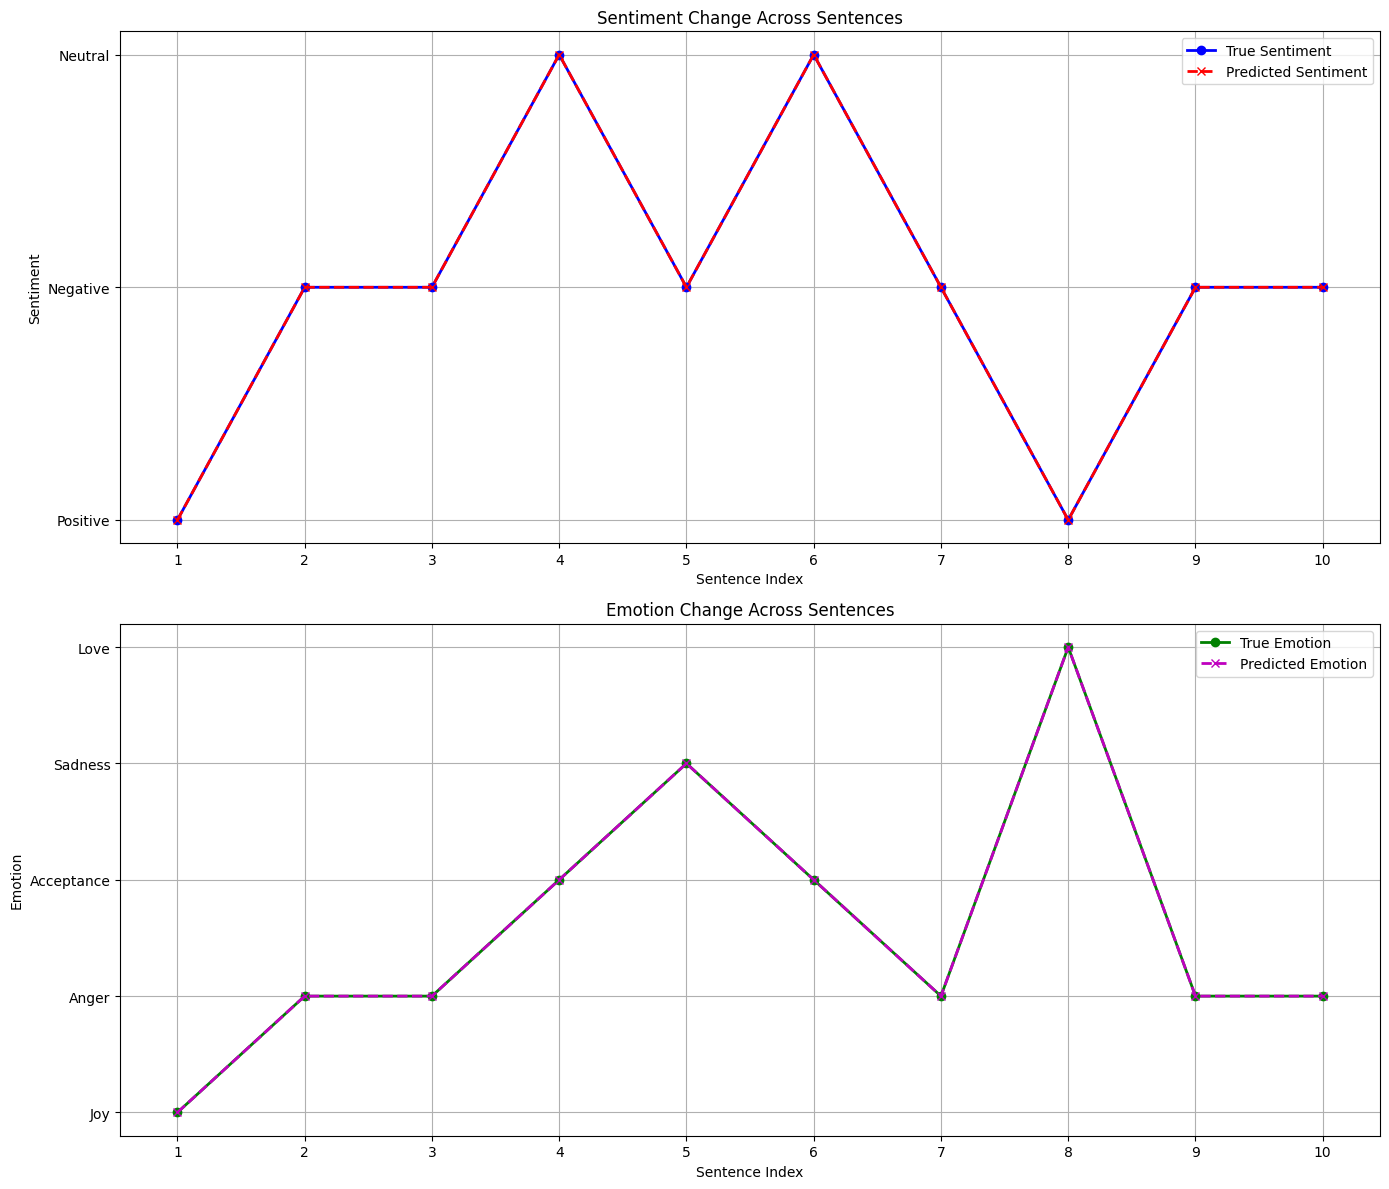

In [6]:
# Line Graph for Sentiment and Emotion Predictions
plt.figure(figsize=(14, 12))

# Sentiment Line Graph
plt.subplot(2, 1, 1)
plt.plot(range(len(sample_sentences)), true_sent_labels, marker='o', linestyle='-', color='b', label='True Sentiment', linewidth=2)
plt.plot(range(len(sample_sentences)), pred_sent_labels, marker='x', linestyle='--', color='r', label='Predicted Sentiment', linewidth=2)
plt.title('Sentiment Change Across Sentences')
plt.xlabel('Sentence Index')
plt.ylabel('Sentiment')
plt.xticks(range(len(sample_sentences)), range(1, len(sample_sentences) + 1))
plt.legend()
plt.grid(True)

# Emotion Line Graph
plt.subplot(2, 1, 2)
plt.plot(range(len(sample_sentences)), true_emo_labels, marker='o', linestyle='-', color='g', label='True Emotion', linewidth=2)
plt.plot(range(len(sample_sentences)), pred_emo_labels, marker='x', linestyle='--', color='m', label='Predicted Emotion', linewidth=2)
plt.title('Emotion Change Across Sentences')
plt.xlabel('Sentence Index')
plt.ylabel('Emotion')
plt.xticks(range(len(sample_sentences)), range(1, len(sample_sentences) + 1))
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
